In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df = df.drop(columns=["Species"])

In [7]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df.shape

(159, 6)

In [9]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [10]:
df.isnull().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
print(df["Weight"].value_counts().head())

Weight
300.0     6
1000.0    5
120.0     5
700.0     5
500.0     5
Name: count, dtype: int64


In [13]:
print(df.corr()["Weight"])

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64


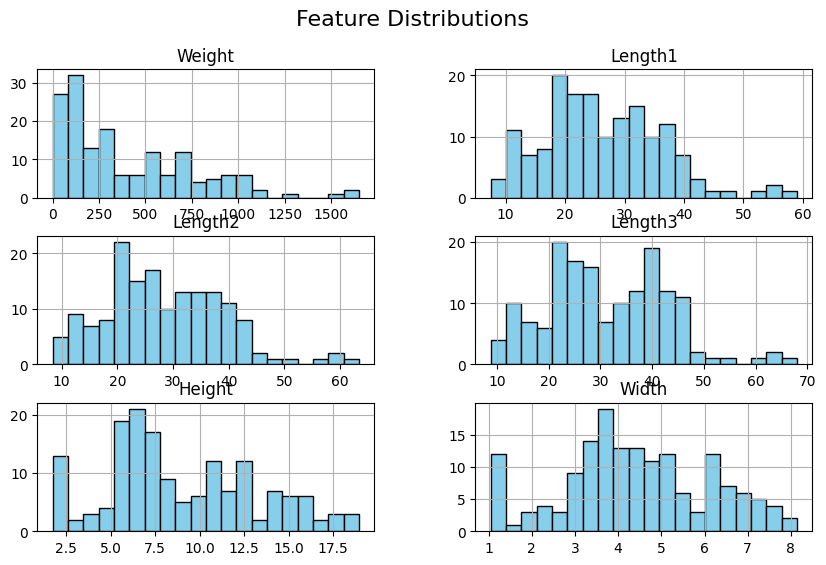

In [14]:
df.hist(figsize=(10,6), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

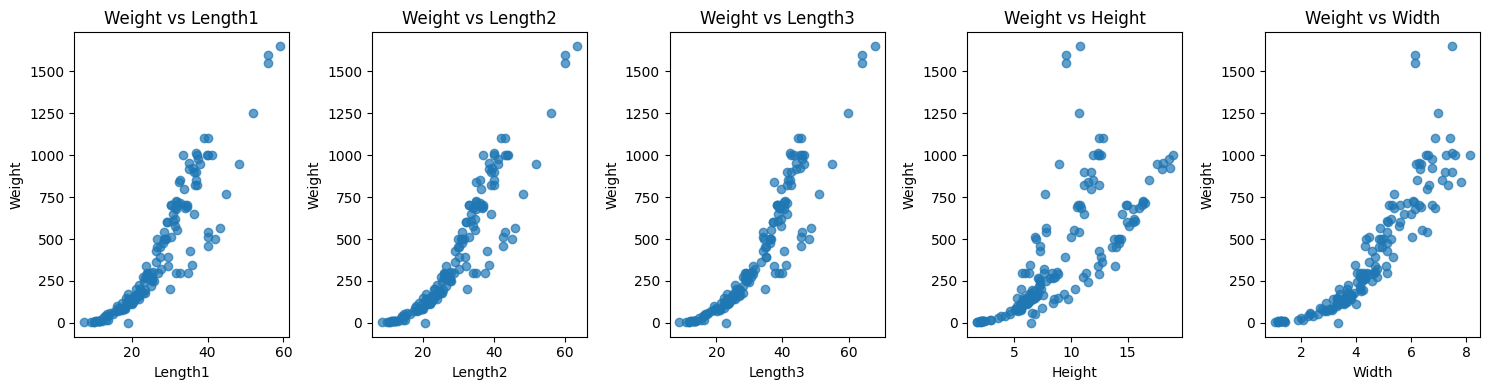

In [15]:
plt.figure(figsize=(15,4))

for i, feature in enumerate(["Length1","Length2","Length3", "Height", "Width"], 1):
    plt.subplot(1, 5, i)
    plt.scatter(df[feature], df["Weight"], alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Weight")
    plt.title(f"Weight vs {feature}")

plt.tight_layout()
plt.show()


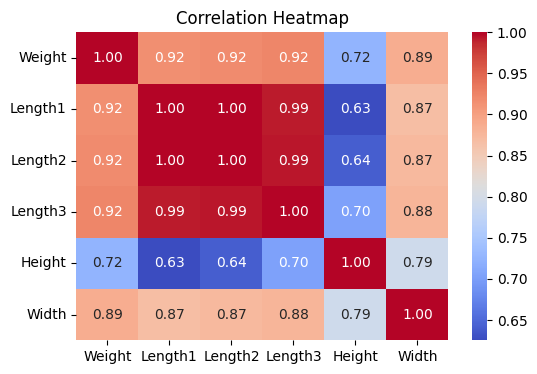

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
X = df[["Length1", "Length2", "Length3", "Height", "Width"]]
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing done. Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)



Data preprocessing done. Shapes:
X_train: (127, 5)
X_test: (32, 5)


In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

y_pred = model.predict(X_test_scaled)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

n = X_test.shape[0]   # number of test samples
p = X_test.shape[1]   # number of features


print("=== Test Set Metrics ===")
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"R²  : {r2:.3f}")



=== Test Set Metrics ===
MAE : 103.909
MSE : 16763.887
R²  : 0.882


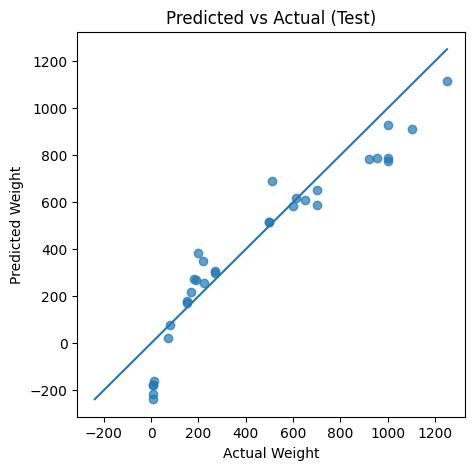

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)

lower = min(y_test.min(), y_pred.min())
upper = max(y_test.max(), y_pred.max())
plt.plot([lower, upper], [lower, upper])
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Predicted vs Actual (Test)")
plt.show()

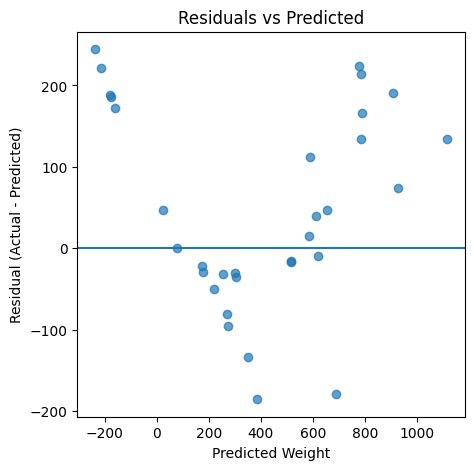

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(5,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0)
plt.xlabel("Predicted Weight")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [24]:
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))


Train Score: -293.6799979110024
Test Score: -249.72687409554916


f:\Machine learning\.venv-1\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
f:\Machine learning\.venv-1\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [25]:
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring="r2")
print("CV mean R2:", np.mean(scores))
print("CV std:", np.std(scores))

CV mean R2: 0.8564192634130254
CV std: 0.0275091337806072


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
num_features = list(X.columns)
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2, include_bias=False))
    ]), num_features)
])


model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring="r2")
print("CV Mean R2:", np.mean(cv_scores))


Train R2: 0.9849528317066156
Test R2: 0.9672675055786777
Train RMSE: 43.00839010952545
Test RMSE: 68.23376482981277
CV Mean R2: 0.9609518128659598


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [29]:
def weight_category(w):
    if w < 200:
        return "Light"
    elif w < 800:
        return "Medium"
    else:
        return "Heavy"

df["WeightClass"] = df["Weight"].apply(weight_category)

X = df[["Length1", "Length2", "Length3", "Height", "Width"]]
y = df["WeightClass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Results : ")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Results : 
Accuracy: 0.9375
              precision    recall  f1-score   support

       Heavy       1.00      1.00      1.00         7
       Light       0.92      0.92      0.92        12
      Medium       0.92      0.92      0.92        13

    accuracy                           0.94        32
   macro avg       0.95      0.95      0.95        32
weighted avg       0.94      0.94      0.94        32



f:\Machine learning\.venv-1\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Decision Tree Results : 
Accuracy: 0.9375
              precision    recall  f1-score   support

       Heavy       1.00      1.00      1.00         7
       Light       0.92      0.92      0.92        12
      Medium       0.92      0.92      0.92        13

    accuracy                           0.94        32
   macro avg       0.95      0.95      0.95        32
weighted avg       0.94      0.94      0.94        32



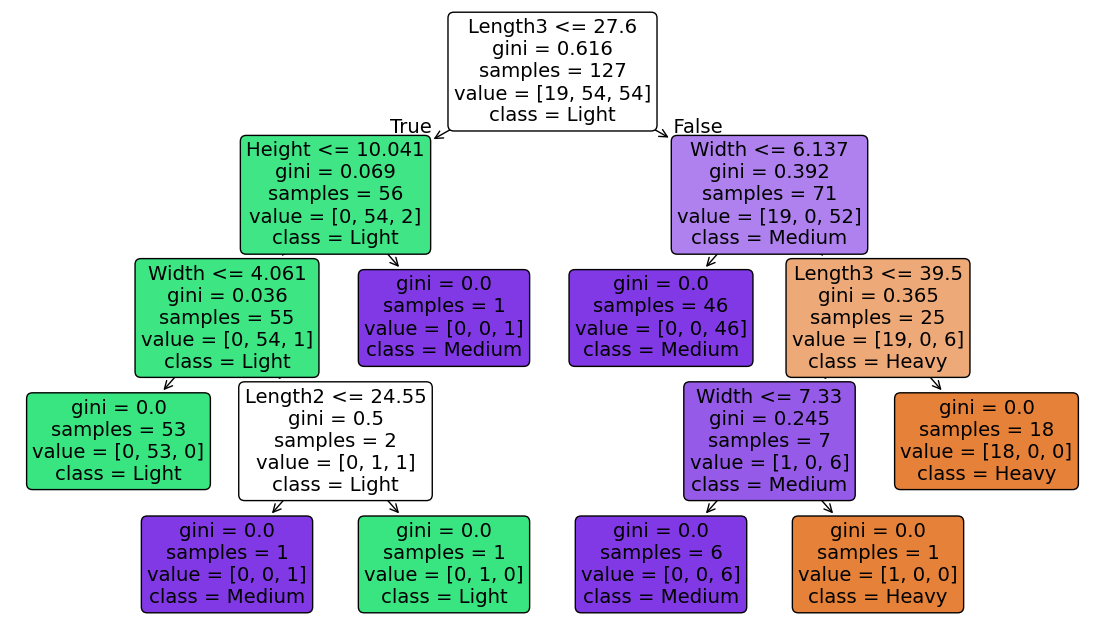

In [31]:
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\nDecision Tree Results : ")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True, rounded=True)
plt.show()


 Random Forest Results
Accuracy: 0.9375
              precision    recall  f1-score   support

       Heavy       1.00      1.00      1.00         7
       Light       0.92      0.92      0.92        12
      Medium       0.92      0.92      0.92        13

    accuracy                           0.94        32
   macro avg       0.95      0.95      0.95        32
weighted avg       0.94      0.94      0.94        32



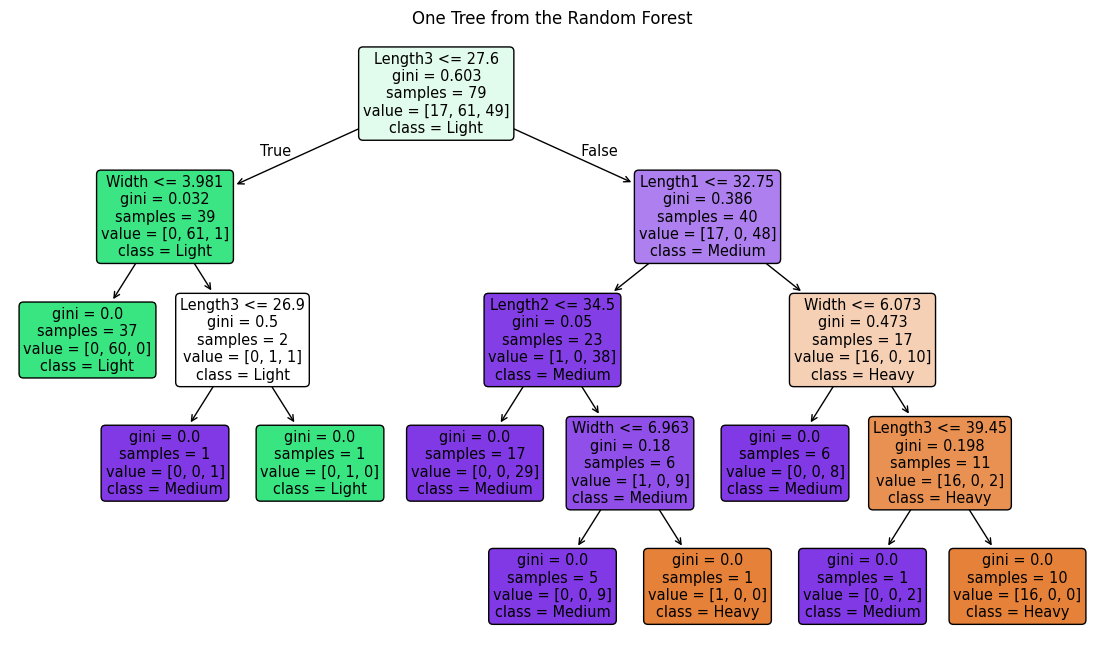

In [32]:
forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print(" Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

plt.figure(figsize=(14, 8))
plot_tree(forest.estimators_[0], feature_names=X.columns, class_names=forest.classes_, filled=True, rounded=True)
plt.title("One Tree from the Random Forest")
plt.show()


In [33]:
#Guassion Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# --- IGNORE ---
    

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)  
y_pred_gnb = gnb.predict(X_test)
print("\nGaussian Naive Bayes Results : ")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))



Gaussian Naive Bayes Results : 
Accuracy: 0.96875


In [35]:
#bagging with Decision Trees

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
RANDOM_STATE = 42


df_c = df.copy()
df_c = df_c.drop(columns=["Weight", "WeightClass"])

X_c = df_c
y_c = df["WeightClass"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=RANDOM_STATE)


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=RANDOM_STATE)
bagging_dt.fit(X_train_c, y_train_c)
y_bagging_dt = bagging_dt.predict(X_test_c)
acc_bagging_dt = accuracy_score(y_test_c, y_bagging_dt)
print('Bagging (Decision Trees) accuracy:', f'{acc_bagging_dt:.4f}')


Bagging (Decision Trees) accuracy: 0.9375


In [38]:
%pip install xgboost

# boosting with xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_c_enc = le.fit_transform(y_train_c)
y_test_c_enc = le.transform(y_test_c)

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=RANDOM_STATE)
xgb_clf.fit(X_train_c, y_train_c_enc)
y_xgb_enc = xgb_clf.predict(X_test_c)
y_xgb = le.inverse_transform(y_xgb_enc)
acc_xgb = accuracy_score(y_test_c, y_xgb)
print('XGBoost accuracy:', f'{acc_xgb:.4f}')


Note: you may need to restart the kernel to use updated packages.
XGBoost accuracy: 0.9688



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
f:\Machine learning\.venv-1\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
